# Business Problem
- An e-commerce company wants to divide its customers into segments and determine marketing strategies according to these segments.

# Data Set Story
- Online Retail II, a dataset of an online retail store based in the UK It includes sales between 01/12/2009 - 09/12/2011.
- Data Set web address
- https://archive.ics.uci.edu/ml/datasets/Online+Retail+II

- **Variables**

- **InvoiceNo:** Invoice number. Unique number for each transaction, i.e. invoice. If it starts with C, the canceled transaction.
- **StockCode:** Product code. Unique number for each product.
- **Description:** Product name.
- **Quantity:** This is the quantity of the product. It expresses how many of the products in the invoices were sold.
- **InvoiceDate:** Invoice date and time.
- **UnitPrice:** Product price (in pounds sterling).
- **CustomerID:** Unique customer number.
- **Country:** Country name. The country where the customer lives.

In [1]:
# import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import plotly.express as px
import warnings

warnings.simplefilter(action="ignore")

In [2]:
# Adjusting Row Column Settings
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: '%.2f' % x)

In [3]:
# Loading the Data Set
df_1 = pd.read_excel("/kaggle/input/uci-online-retail-ii-data-set/online_retail_II.xlsx", sheet_name="Year 2009-2010")
df_2 = pd.read_excel("/kaggle/input/uci-online-retail-ii-data-set/online_retail_II.xlsx", sheet_name="Year 2010-2011")

In [4]:
df = pd.concat([df_1, df_2], ignore_index=True)

In [5]:
df.shape

(1067371, 8)

In [6]:
# Preliminary examination of the data set
def check_df(dataframe, head=5):
    print('##################### Shape #####################')
    print(dataframe.shape)
    print('##################### Types #####################')
    print(dataframe.dtypes)
    print('##################### Head #####################')
    print(dataframe.head(head))
    print('##################### Tail #####################')
    print(dataframe.tail(head))
    print('##################### NA #####################')
    print(dataframe.isnull().sum())
    print('##################### Quantiles #####################')
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

##################### Shape #####################
(1067371, 8)
##################### Types #####################
Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object
##################### Head #####################
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95     13085.00  United Kingdom  
1 2009-12-01 07:45:00   6.75     13085.00  

In [7]:
# Examination of numerical and categorical variables

def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    Returns the names of categorical, numeric and categorical but cardinal variables in the data set.
    Note Categorical variables include categorical variables with numeric appearance.
    Parameters
    ------
         dataframe: dataframe
                Dataframe to get variable names
        cat_th: int, optional
                class threshold for numeric but categorical variables
        car_th: int, optinal
                class threshold for categorical but cardinal variables
    Returns
    ------
        cat_cols: list
                Categorical variable list
        num_cols: list
                Numeric variable list
        cat_but_car: list
                List of cardinal variables with categorical view
    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))
    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables
        num_but_cat is inside cat_cols.
        The sum of the 3 return lists equals the total number of variables: cat_cols + num_cols + cat_but_car = number of variables
    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == 'O']
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != 'O']
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == 'O']
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != 'O']
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f'Observations: {dataframe.shape[0]}')
    print(f'Variables: {dataframe.shape[1]}')
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car, num_but_cat

cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df)

Observations: 1067371
Variables: 8
cat_cols: 0
num_cols: 4
cat_but_car: 4
num_but_cat: 0


In [8]:
# We selected the sales with a sales number greater than zero from df and reassigned it to the df variable. 
#The reason for doing this is to remove the purchase returns from the data set.

df = df[(df['Quantity'] > 0)]

In [9]:
# We removed empty observations from the data set.
df.dropna(inplace=True)

In [10]:
df.shape

(805620, 8)

In [11]:
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [12]:
# From the observations in the dataset, we selected the observations that do not contain the C expression.
df = df[df["Invoice"].astype(str).str.contains("C")==False]

count   805620.00
mean        13.31
std        144.31
min          1.00
5%           1.00
10%          1.00
20%          2.00
30%          2.00
40%          3.00
50%          5.00
60%          6.00
70%         12.00
80%         12.00
90%         24.00
95%         36.00
99%        128.00
max      80995.00
Name: Quantity, dtype: float64


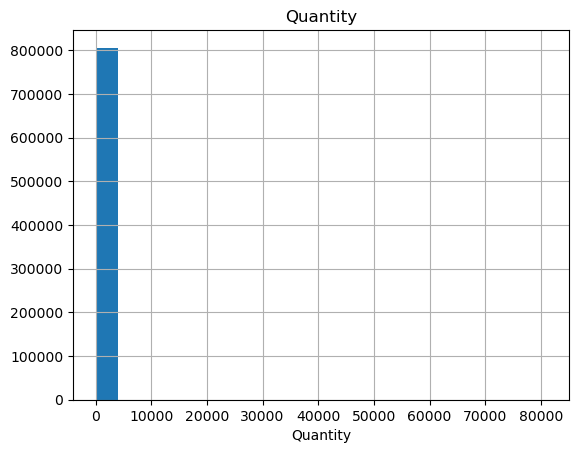

count                  805620
unique                  34591
top       2011-11-14 15:27:00
freq                      542
first     2009-12-01 07:45:00
last      2011-12-09 12:50:00
Name: InvoiceDate, dtype: object


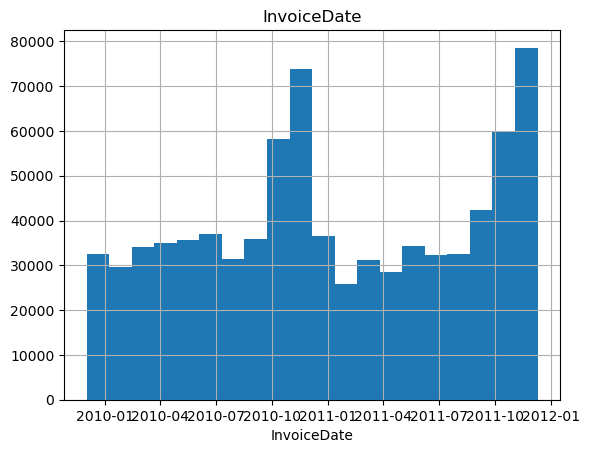

count   805620.00
mean         3.21
std         29.20
min          0.00
5%           0.42
10%          0.55
20%          0.85
30%          1.25
40%          1.65
50%          1.95
60%          2.46
70%          2.95
80%          4.25
90%          6.75
95%          8.50
99%         14.95
max      10953.50
Name: Price, dtype: float64


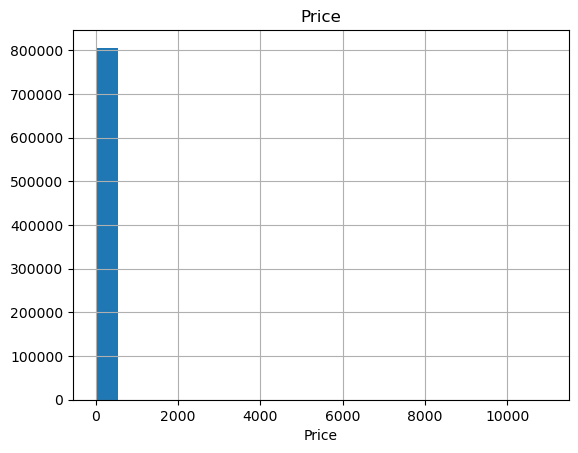

count   805620.00
mean     15331.86
std       1696.77
min      12346.00
5%       12681.00
10%      12979.00
20%      13596.00
30%      14204.00
40%      14702.00
50%      15271.00
60%      15880.00
70%      16549.00
80%      17116.00
90%      17716.00
95%      17913.00
99%      18204.00
max      18287.00
Name: Customer ID, dtype: float64


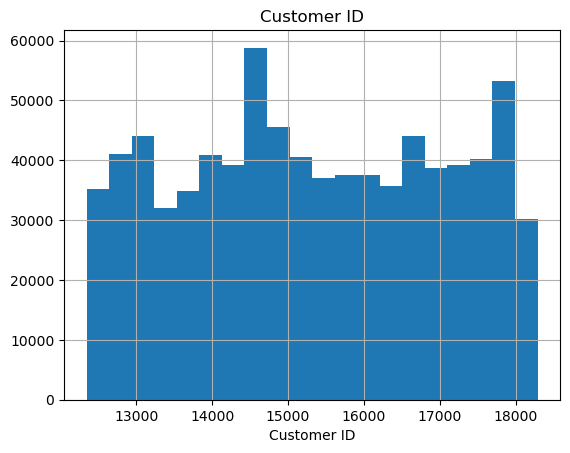

In [13]:
# Numerical variable analysis
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

for col in num_cols:
    num_summary(df, col, plot=True)

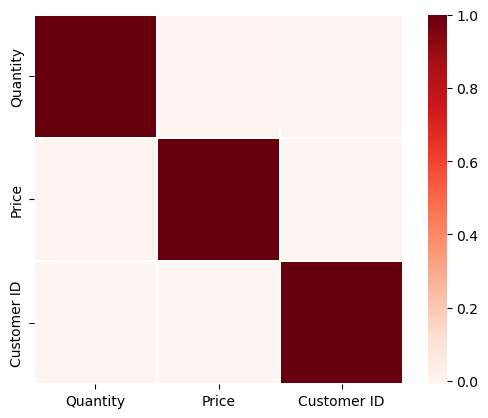

Quantity  Customer ID   0.01
Price     Customer ID   0.01
Quantity  Price         0.00
dtype: float64

In [14]:
# Correlation Analysis of the Variables

def df_corr(dataframe, annot=True):
    sns.heatmap(dataframe.corr(), annot=annot, linewidths=.2, cmap='Reds', square=True)
    plt.show(block=True)

def high_correlated_cols(dataframe,head=10):
    corr_matrix = dataframe.corr().abs()
    corr_cols = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1)
                                   .astype(bool)).stack().sort_values(ascending=False)).head(head)
    return corr_cols

df_corr(df, annot=False)
high_correlated_cols(df, 15)

# Calculating RFM Metrics (Recency, Frequency, Monetary)

In [15]:
# Present Date (date of analysis)
today_date = dt.datetime(2011, 12, 11)

- **InvoiceDate** => Recency
- **Invoice**     => Frequency                            
- **TotalPrice**  => Monetary

In [16]:
# Creation of TotalPrice
df["TotalPrice"] = df["Quantity"] * df["Price"]

In [17]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00


In [18]:
df["InvoiceDate"].max()

Timestamp('2011-12-09 12:50:00')

In [19]:
today_date

datetime.datetime(2011, 12, 11, 0, 0)

In [20]:
# Calculating RFM Metrics
rfm = df.groupby('Customer ID').agg({'InvoiceDate': lambda InvoiceDate: (today_date - InvoiceDate.max()).days,
                                     'Invoice': lambda Invoice: Invoice.nunique(),
                                     'TotalPrice': lambda TotalPrice: TotalPrice.sum()})

In [21]:
rfm.head()

,InvoiceDate,Invoice,TotalPrice
Customer ID,,,
12346.00,326,12,77556.46
12347.00,3,8,5633.32
12348.00,76,5,2019.40
12349.00,19,4,4428.69
12350.00,311,1,334.40


In [22]:
# Changing column names
rfm.columns = ['recency', 'frequency', 'monetary']

In [23]:
rfm.head()

,recency,frequency,monetary
Customer ID,,,
12346.00,326,12,77556.46
12347.00,3,8,5633.32
12348.00,76,5,2019.40
12349.00,19,4,4428.69
12350.00,311,1,334.40


In [24]:
# Avoiding negative values due to refunds
rfm = rfm[rfm["monetary"] > 0]

# Calculating RFM Scores (Recency_Score, Frequency_Score, Monetary_Score)

In [25]:
# Calculating Recency_Score
rfm["recency_score"] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])

In [26]:
rfm.head()

,recency,frequency,monetary,recency_score
Customer ID,,,,
12346.00,326,12,77556.46,2
12347.00,3,8,5633.32,5
12348.00,76,5,2019.40,3
12349.00,19,4,4428.69,5
12350.00,311,1,334.40,2


In [27]:
# Calculating Frequency_Score
rfm["frequency_score"] = pd.qcut(rfm['frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

In [28]:
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score
Customer ID,,,,,
12346.00,326,12,77556.46,2,5
12347.00,3,8,5633.32,5,4
12348.00,76,5,2019.40,3,4
12349.00,19,4,4428.69,5,3
12350.00,311,1,334.40,2,1


In [29]:
# Calculating Monetary_Score
rfm["monetary_score"] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])

In [30]:
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score
Customer ID,,,,,,
12346.00,326,12,77556.46,2,5,5
12347.00,3,8,5633.32,5,4,5
12348.00,76,5,2019.40,3,4,4
12349.00,19,4,4428.69,5,3,5
12350.00,311,1,334.40,2,1,2


In [31]:
# Creating RFM_SSCORE VARIABLE
rfm["RFM_SCORE"] = (rfm['recency_score'].astype(str) +
                    rfm['frequency_score'].astype(str))

In [32]:
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE
Customer ID,,,,,,,
12346.00,326,12,77556.46,2,5,5,25
12347.00,3,8,5633.32,5,4,5,54
12348.00,76,5,2019.40,3,4,4,34
12349.00,19,4,4428.69,5,3,5,53
12350.00,311,1,334.40,2,1,2,21


# Creating & Analysing RFM Segments

![](https://miro.medium.com/max/617/1*oUKMc3gk53hccFX4YNeu1g.png)

* **Champions** are the best customers, who bought most recently, most often, and are heavy spenders. Reward these customers. They can be the first to buy new products

* **Potential Loyalists** are the recent customers with average frequency and who spent a good amount. You can make them your Loyalists or Champions by offering membership or loyalty programs or recommending related products to them.

* **New Customers** are the customers who have a high overall RFM score but are not frequent shoppers. Special offers can be provided to increase their visits

* **At Risk Customers** are the customers who purchased often and spent big amounts, but haven’t purchased recently. Personalized deals and product/service recommendations can help reactivate them

* **Can’t Lose Them** are the customers who used to visit and purchase quite often, but haven’t been visiting recently. Get them to revisit with relevant promotions and conduct surveys to find out what went wrong and not lose them to a competitor.

In [33]:
# Creation of a segment map
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

In [34]:
rfm['segment'] = rfm['RFM_SCORE'].replace(seg_map, regex=True)

In [35]:
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
Customer ID,,,,,,,,
12346.00,326,12,77556.46,2,5,5,25,cant_loose
12347.00,3,8,5633.32,5,4,5,54,champions
12348.00,76,5,2019.40,3,4,4,34,loyal_customers
12349.00,19,4,4428.69,5,3,5,53,potential_loyalists
12350.00,311,1,334.40,2,1,2,21,hibernating


In [36]:
rfm.shape

(5878, 8)

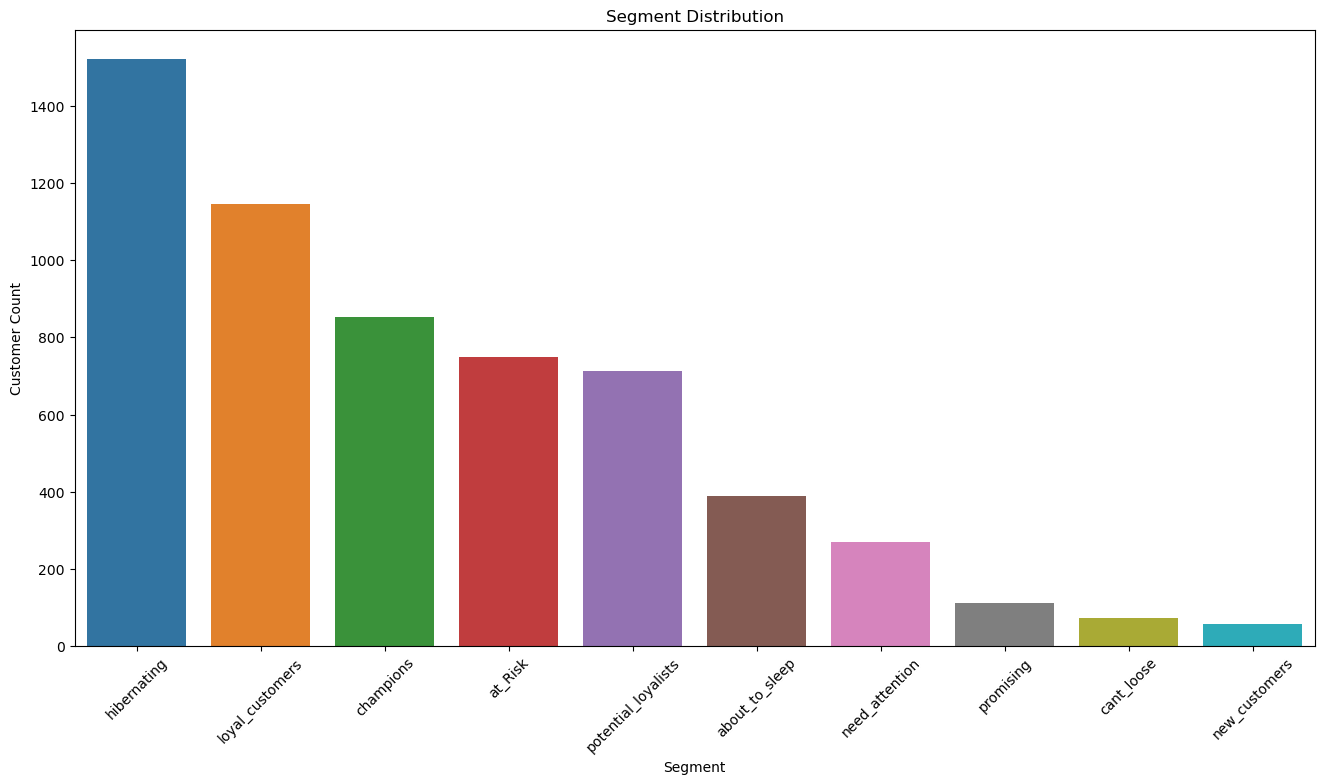

In [37]:
# Segment Distribution
segment_counts = rfm['segment'].value_counts()
plt.figure(figsize=(16, 8))
sns.barplot(x=segment_counts.index, y=segment_counts.values)
plt.title('Segment Distribution')
plt.xlabel('Segment')
plt.ylabel('Customer Count')
plt.xticks(rotation=45)
plt.show()


In [38]:
# Segment Analysis
fig = px.scatter(rfm, x='recency', y='frequency', color='segment', title='RFM Segments')
fig.show()



In [39]:
rfm[["segment", "recency", "frequency", "monetary"]].groupby("segment").agg(["mean", "count"])

recency       frequency       monetary      
                       mean count      mean count     mean count
segment                                                         
about_to_sleep       107.62   388      1.36   388   531.97   388
at_Risk              373.94   750      3.90   750  1383.60   750
cant_loose           331.80    71     15.93    71  8355.68    71
champions              9.25   852     19.22   852 10795.52   852
hibernating          460.01  1522      1.25  1522   437.96  1522
loyal_customers       68.31  1147      9.80  1147  4199.73  1147
need_attention       114.24   269      3.16   269  1283.11   269
new_customers         11.30    56      1.00    56   356.26    56
potential_loyalists   26.30   713      2.59   713  1155.43   713
promising             39.28   110      1.00   110   324.50   110

In [40]:
new_df = pd.DataFrame()

In [41]:
new_df["new_customer_id"] = rfm[rfm["segment"] == "new_customers"].index

In [42]:
new_df.head()

,new_customer_id
0,12367.00
1,12442.00
2,12478.00
3,12479.00
4,12558.00


In [43]:
new_df["new_customer_id"] = new_df["new_customer_id"].astype(int)

In [44]:
new_df.head()

,new_customer_id
0,12367
1,12442
2,12478
3,12479
4,12558


In [45]:
#new_df.to_csv("new_customers.csv")

In [46]:
#rfm.to_csv("rfm.csv")

In [47]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00


In [48]:
# Convert InvoiceDate to a datetime object

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract day, year, time and hour
df['Day'] = df['InvoiceDate'].dt.day
df['Month'] = df['InvoiceDate'].dt.month
df['Year'] = df['InvoiceDate'].dt.year
df['Time'] = df['InvoiceDate'].dt.time
df['Hour'] = df['InvoiceDate'].dt.hour

In [49]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,Day,Month,Year,Time,Hour
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40,1,12,2009,07:45:00,7
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00,1,12,2009,07:45:00,7
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00,1,12,2009,07:45:00,7
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,100.80,1,12,2009,07:45:00,7
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00,1,12,2009,07:45:00,7


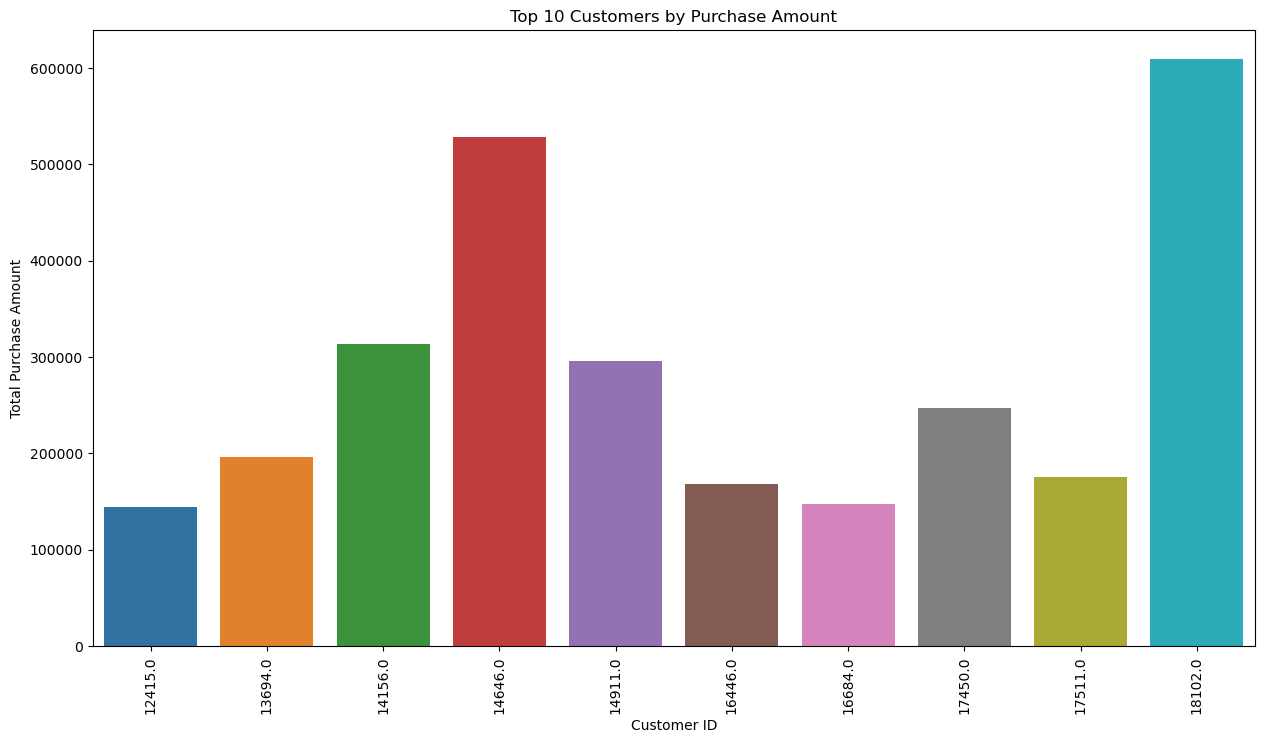

In [50]:
# Top 10 Customers
top_customers = df.groupby('Customer ID')['TotalPrice'].sum().sort_values(ascending=False).head(10)

# Create a bar chart
plt.figure(figsize=(15,8))
sns.barplot(x=top_customers.index, y=top_customers.values)
plt.title('Top 10 Customers by Purchase Amount')
plt.xlabel('Customer ID')
plt.xticks(rotation = 90)
plt.ylabel('Total Purchase Amount')
plt.show()

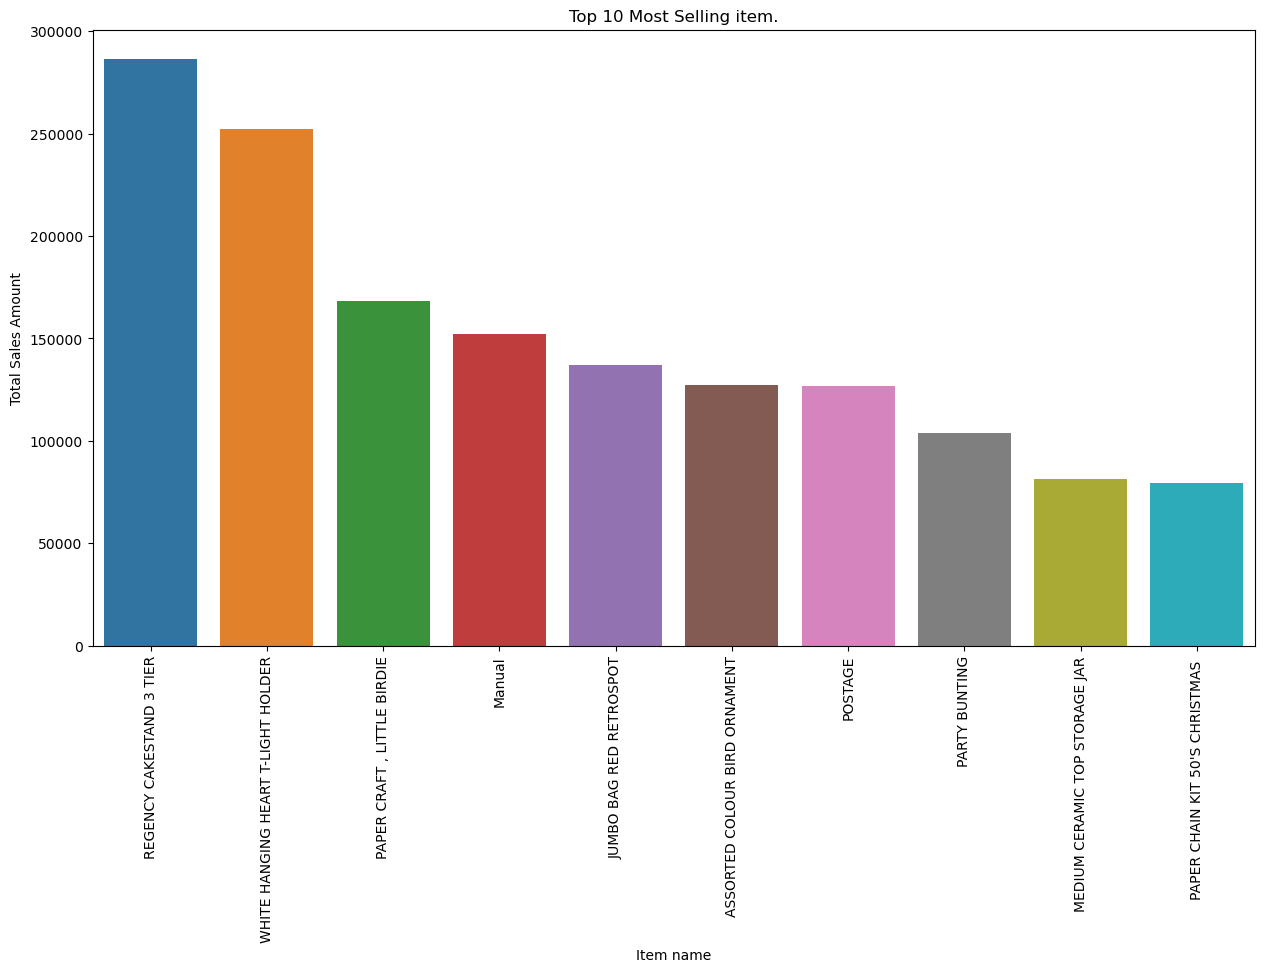

In [51]:
# Top 10 Most Selling Items
top_item = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)

# Create a bar chart
plt.figure(figsize=(15,8))
sns.barplot(x=top_item.index, y=top_item.values)
plt.title('Top 10 Most Selling item.')
plt.xticks(rotation = 90)
plt.ylabel('Total Sales Amount')
plt.xlabel('Item name')
plt.show()

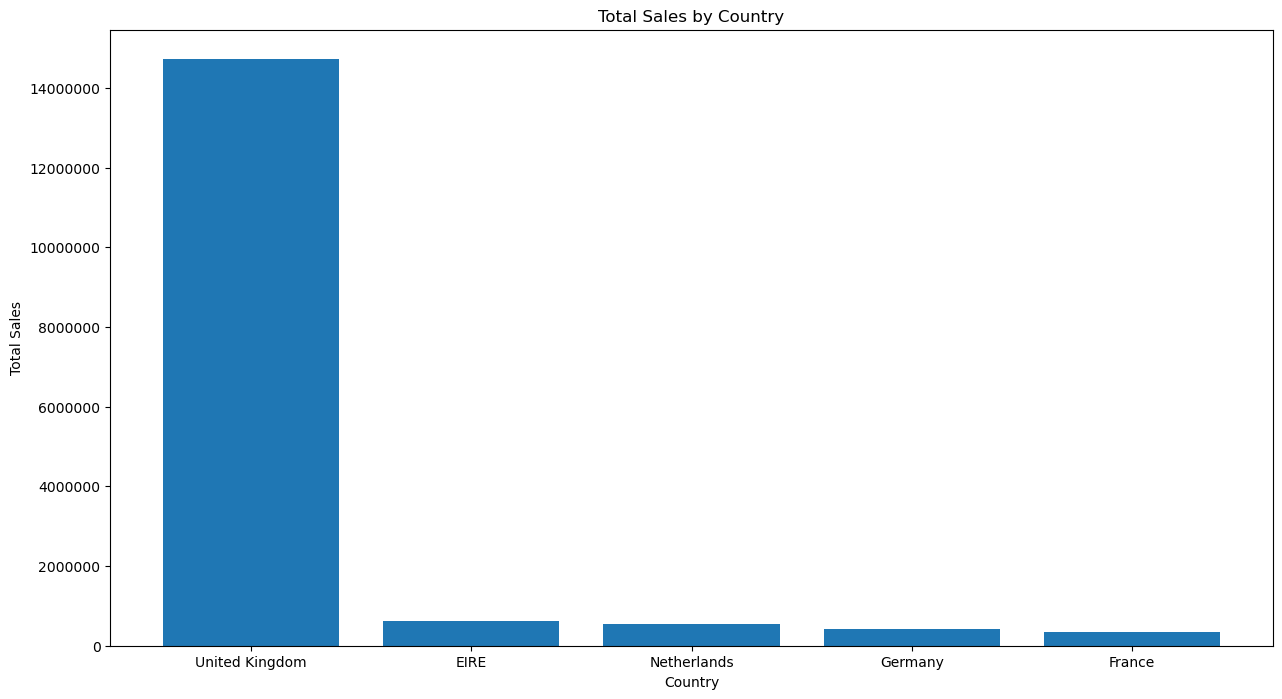

In [52]:
# Top 5 Purchasing Country

# Calculate total sales by country
sales_by_country = df.groupby('Country')['TotalPrice'].sum().reset_index()

# Sort the sales by descending order
sales_by_country = sales_by_country.sort_values(by='TotalPrice', ascending=False).head(5)

# Create the bar chart
plt.figure(figsize=(15,8))
plt.bar(sales_by_country['Country'], sales_by_country['TotalPrice'])
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.title('Total Sales by Country')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

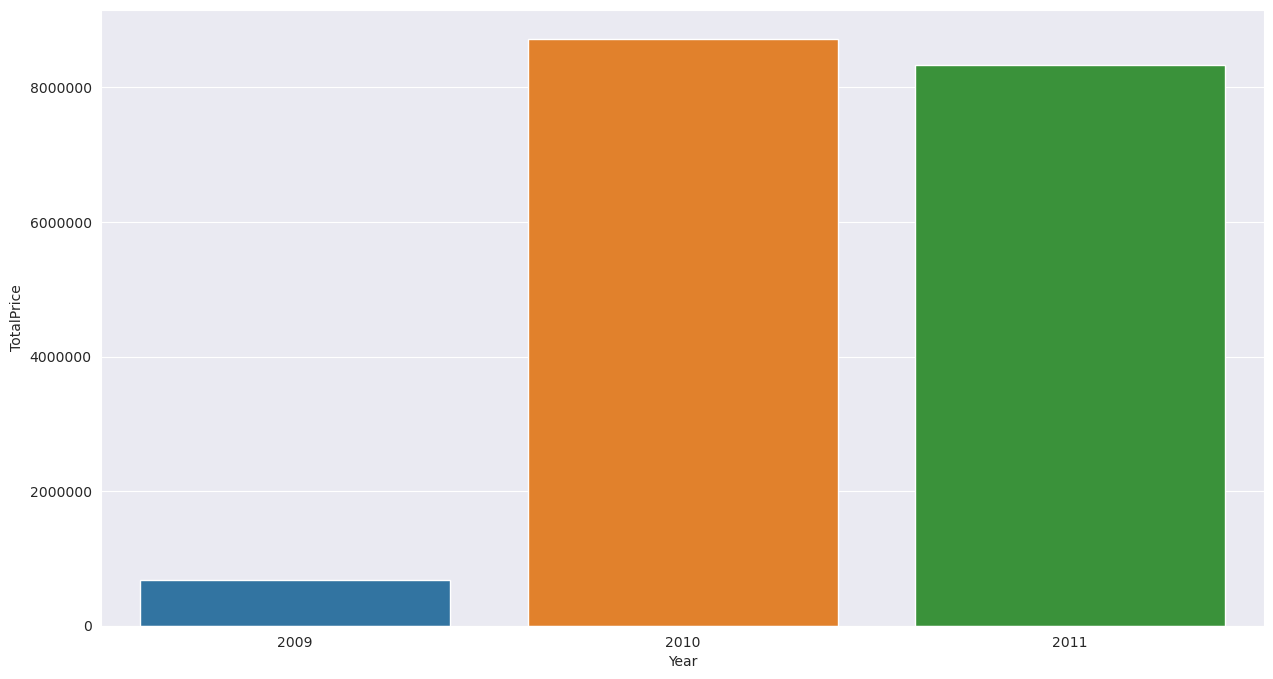

In [53]:
# Sales By Years

# Group by year and sum TotalPrice
sales_by_year = df.groupby('Year')['TotalPrice'].sum().reset_index()

# Create bar chart using Seaborn
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')
sns.barplot(x='Year', y='TotalPrice', data=sales_by_year)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

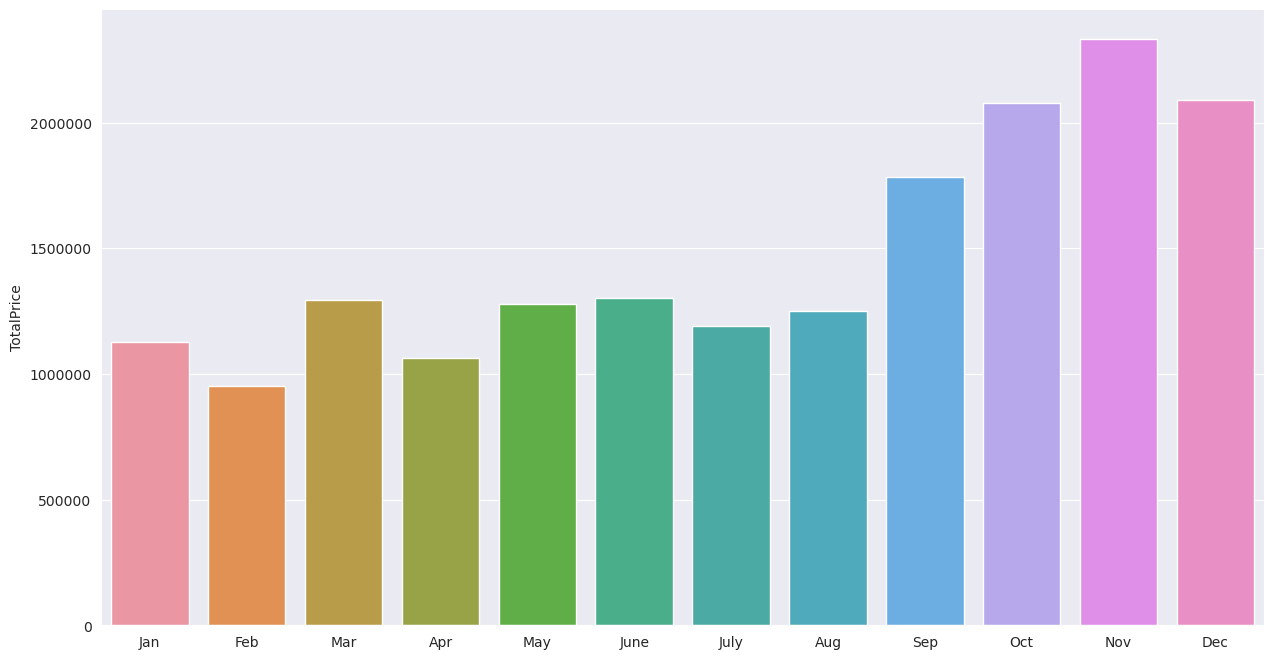

In [54]:
# Sales By Month
# Group by months and sum TotalPrice
sales_by_months = df.groupby('Month')['TotalPrice'].sum().reset_index()
month=['Jan', 'Feb','Mar','Apr', 'May', 'June', 'July', "Aug", "Sep", 'Oct', 'Nov', 'Dec']
# Create bar chart using Seaborn
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')
sns.barplot(x=month, y=sales_by_months['TotalPrice'], data=sales_by_year)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

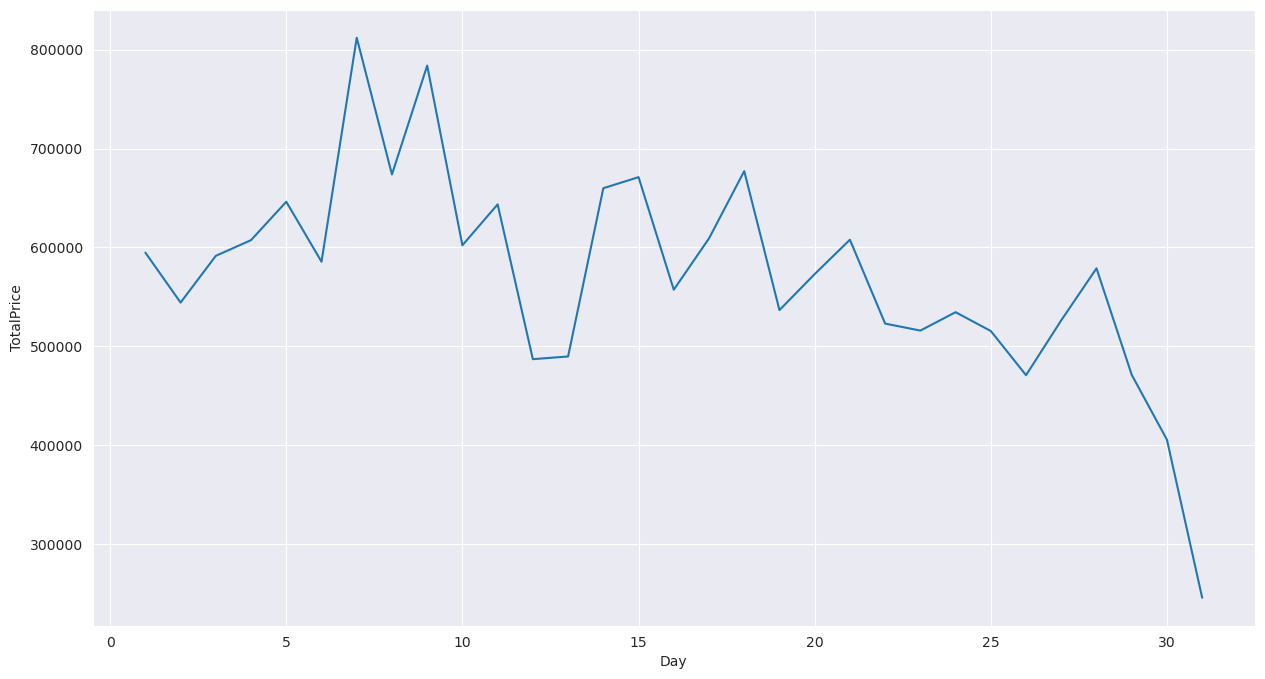

In [55]:
# Sales By Day

# Group by day and sum TotalPrice
sales_by_months = df.groupby('Day')['TotalPrice'].sum().reset_index()

# Create bar chart using Seaborn
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')
sns.lineplot(x=sales_by_months.Day, y=sales_by_months.TotalPrice, data=sales_by_year)
plt.show()

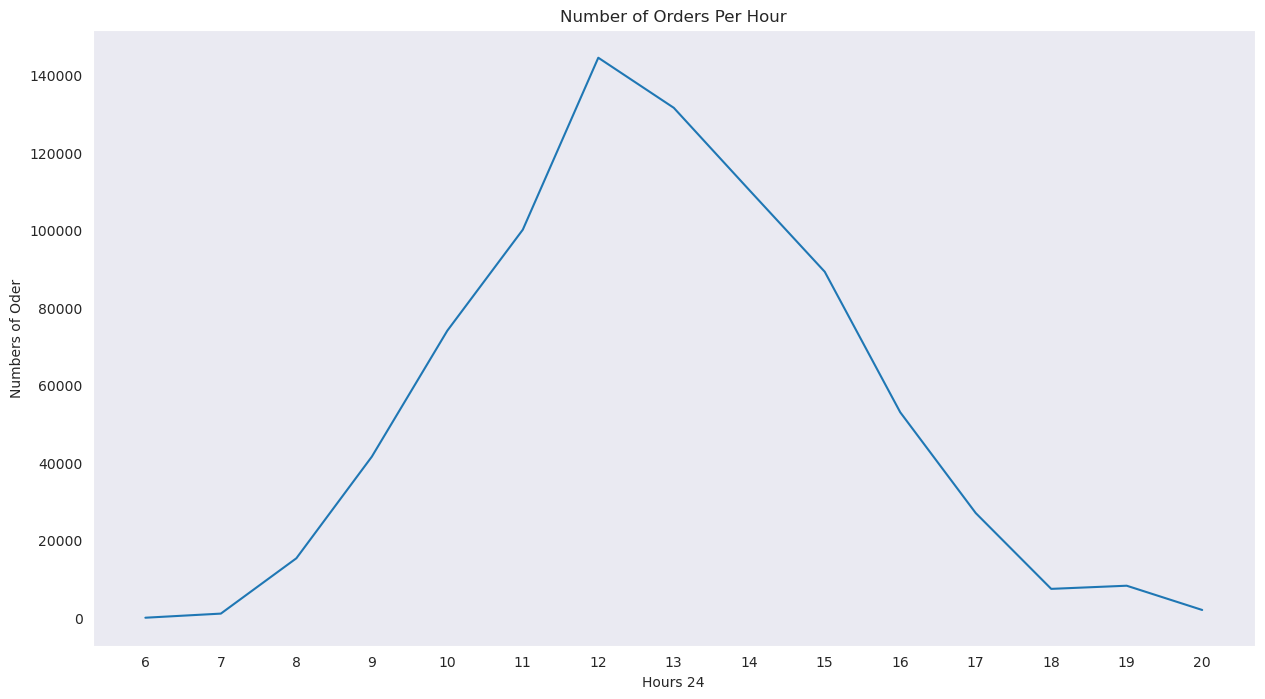

In [56]:
# Sales By Hour

c=df.groupby('Hour').count()
hours=[hour for hour , df in df.groupby('Hour')]
plt.figure(figsize=(15,8))
plt.plot(hours,c['Quantity'])
plt.xticks(hours)
plt.title('Number of Orders Per Hour')
plt.xlabel('Hours 24')
plt.ylabel('Numbers of Oder')
plt.grid()
plt.show()